In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp

In [7]:
# df = pd.read_excel("iris_xlsx.xlsx")
df = pd.read_csv("iris_xlsx.csv")
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [6]:
stat, p = ttest_1samp(df["Sepal.Length"], 
                       popmean = 4) # popmean: population mean, 모평균
print(round(stat, 5), round(p, 5))

27.26368 0.0


In [8]:
df["Sepal.Length"].mean()

5.843333333333335

In [27]:
stat, p = ttest_1samp(df["Sepal.Length"], popmean = 5.8433333) 
print(round(stat, 5), round(p, 5))

0.0 1.0


In [28]:
from scipy.stats import ttest_ind

In [29]:
from scipy.stats import f_oneway

In [32]:
df = pd.read_excel("iris_xlsx.xlsx")
stat, p = f_oneway(df["Sepal.Length"],
                    df["Sepal.Width"],
                    df["Petal.Width"])
print(stat, p)

1687.7787566829397 4.870864688116365e-209


In [ ]:
# !pip install pandas --upgrade --user
!pip install statsmodels --upgrade --user

In [3]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [10]:
bike = pd.read_csv("bike.csv")
bike.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [5]:
formula1 = "casual ~ season"
formula2 = "casual ~ C(season)"

In [6]:
lm1 = ols(formula1, bike).fit()
lm2 = ols(formula2, bike).fit()

In [7]:
anova_lm(lm1)

df        sum_sq        mean_sq           F        PR(>F)
season        1.0  2.543642e+05  254364.153634  102.860335  4.600135e-24
Residual  10884.0  2.691513e+07    2472.908085         NaN           NaN

In [9]:
anova_lm(lm2)

df        sum_sq        mean_sq           F         PR(>F)
C(season)      3.0  2.357570e+06  785856.669382  344.660562  7.937799e-214
Residual   10882.0  2.481193e+07    2280.088747         NaN            NaN

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [21]:
df = pd.read_csv("diamonds.csv")

In [23]:
posthoc = pairwise_tukeyhsd(df["price"], df["cut"])
print(posthoc)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05  
 group1   group2   meandiff   lower      upper   reject
-------------------------------------------------------
  Fair     Good   -429.8933 -740.4567  -119.3299  True 
  Fair    Ideal   -901.2158 -1180.5785 -621.8531  True 
  Fair   Premium   225.4999  -59.2739   510.2738 False 
  Fair  Very Good -376.9979 -663.8694   -90.1263  True 
  Good    Ideal   -471.3225  -642.367  -300.2779  True 
  Good   Premium   655.3933  475.6466   835.1399  True 
  Good  Very Good  52.8954  -130.1565   235.9474 False 
 Ideal   Premium  1126.7157 1008.8058  1244.6257  True 
 Ideal  Very Good  524.2179  401.3281   647.1078  True 
Premium Very Good -602.4978 -737.2366  -467.7591  True 
-------------------------------------------------------


In [24]:
from scipy.stats import bartlett
stat, p = bartlett(df.loc[df["cut"] == "Good", "price"],
                   df.loc[df["cut"] == "Ideal", "price"],
                   df.loc[df["cut"] == "Premium", "price"])
print(stat, p)

368.0903292307125 1.175440327456315e-80


세 집단간 등분산 검정 결과. p-value는 $0.17 \times 10^{-80}$으로 유의수준 5% 기준 보다 작다. 즉 집단간 분산은 서로 같다고 할 수 있다. (통계적으로 유의미하게 집단간 분산이 다르지 않음) 즉, 등분산 가정을 만족함

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

In [13]:
df = pd.read_csv("AWS_sample.txt", sep = "#")
df = df.loc[df["AWS_ID"] == 108, :]
df.head(2)

AWS_ID             TM    TA  Wind X.
0     108  2016-07-01 00  24.2   2.3  =
1     108  2016-07-01 01  24.3   2.3  =

In [14]:
df["TM"] = pd.to_datetime(df["TM"])
df = df.set_index("TM")
df.head(2)

AWS_ID    TA  Wind X.
TM                                        
2016-07-01 00:00:00     108  24.2   2.3  =
2016-07-01 01:00:00     108  24.3   2.3  =

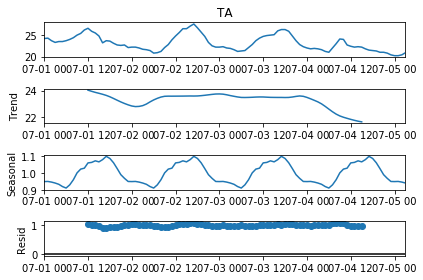

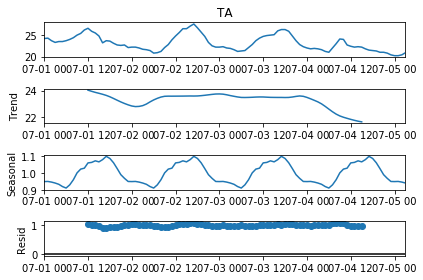

In [19]:
result = seasonal_decompose(df["TA"][:100], model = "multiplicative")
result.plot()

In [23]:
dcomp_trend = result.trend
dcomp_seasonal = result.seasonal
dcomp_resid = result.resid

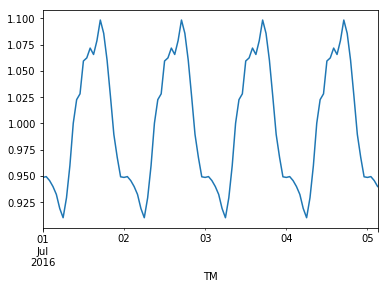

In [24]:
dcomp_seasonal.plot()

In [26]:
df = pd.read_csv("diabetes.csv")
df.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

diabetes.csv 파일을 활용하여 다음의 문제를 풀이하시오.

### 첫 번째 환자와 두 번째 환자의 유클리드 거리를 계산하시오.

### 두 번째 환자와 세 번째 환자의 유클리드 거리를 계산하시오.

※ pandas.DataFrame.transpose() 활용 권장

In [29]:
df_trans = df.head(3).transpose()
df_trans.head(2)

0     1      2
Pregnancies    6.0   1.0    8.0
Glucose      148.0  85.0  183.0

In [42]:
print(sum((df_trans[0] - df_trans[1]) ** 2) ** 0.5)
print(sum((df_trans[1] - df_trans[2]) ** 2) ** 0.5)

66.91095706982526
102.52313417468274


In [ ]:
# import math
# math.sqrt()
# np.sqrt()

In [40]:
from scipy.spatial.distance import euclidean
print(euclidean(df_trans[0], df_trans[1]))
print(euclidean(df_trans[1], df_trans[2]))

66.91095706982527
102.52313417468274


In [33]:
from scipy.spatial.distance import cityblock # 맨해튼

66.91095706982527

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler_minmax = MinMaxScaler()
scaler_minmax = scaler_minmax.fit(df_trans) # df_trans 객체의 데이터 기준으로 맞춤

In [47]:
# df_trans 객체 기준으로 설정된 변환기를 df_trans 객체에 적용
scaler_minmax.transform(df_trans)

array([[0.04054054, 0.01176471, 0.04371585],
       [1.        , 1.        , 1.        ],
       [0.48648649, 0.77647059, 0.34972678],
       [0.23648649, 0.34117647, 0.        ],
       [0.        , 0.        , 0.        ],
       [0.22702703, 0.31294118, 0.1273224 ],
       [0.00423649, 0.00412941, 0.00367213],
       [0.33783784, 0.36470588, 0.17486339],
       [0.00675676, 0.        , 0.00546448]])

In [48]:
df_trans

0       1        2
Pregnancies                 6.000   1.000    8.000
Glucose                   148.000  85.000  183.000
BloodPressure              72.000  66.000   64.000
SkinThickness              35.000  29.000    0.000
Insulin                     0.000   0.000    0.000
BMI                        33.600  26.600   23.300
DiabetesPedigreeFunction    0.627   0.351    0.672
Age                        50.000  31.000   32.000
Outcome                     1.000   0.000    1.000

In [49]:
scaler_minmax.transform(np.array([[1, 2, 3],
                                   [4, 5, 6]]))

array([[0.00675676, 0.02352941, 0.01639344],
       [0.02702703, 0.05882353, 0.03278689]])